Nov 7
- calculate avg #GCs in each halo mass, adjust (z_form, M_h_form) conditions


In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
path = '/data/lemn/theory_results/'

In [4]:
ntrees = 100
n_mass = 48

data = np.zeros((ntrees,n_mass))

fixed $z_{form}$, change $M_{form}$

In [8]:
#for z_form = 8.65, M_form = 1e7 M_sun
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'M1e7.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass = np.loadtxt(path+'GCs-tree1M1e7.txt',usecols =(0))    

N_M1e7 = np.zeros(n_mass)
error_M1e7 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_M1e7[i]     = np.mean(data[0:ntrees,i])
    error_M1e7[i] = np.std(data[0:ntrees,i]) #standard deviation

In [15]:
#for z_form = 8.65, M_form = 5e7 M_sun
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'M5e7.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass5e7 = np.loadtxt(path+'GCs-tree1M5e7.txt',usecols =(0))    

N_M5e7 = np.zeros(n_mass)
error_M5e7 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_M5e7[i]     = np.mean(data[0:ntrees,i])
    error_M5e7[i] = np.std(data[0:ntrees,i]) #standard deviation

In [16]:
#for z_form = 8.65, M_form = 5e8 M_sun
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'M5e8.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
mass5e8 = np.loadtxt(path+'GCs-tree1M5e8.txt',usecols =(0))    

N_M5e8 = np.zeros(n_mass)
error_M5e8 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_M5e8[i]     = np.mean(data[0:ntrees,i])
    error_M5e8[i] = np.std(data[0:ntrees,i]) #standard deviation

In [9]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
#N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
#err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
#N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
#err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
#N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
#err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
#N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
#err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

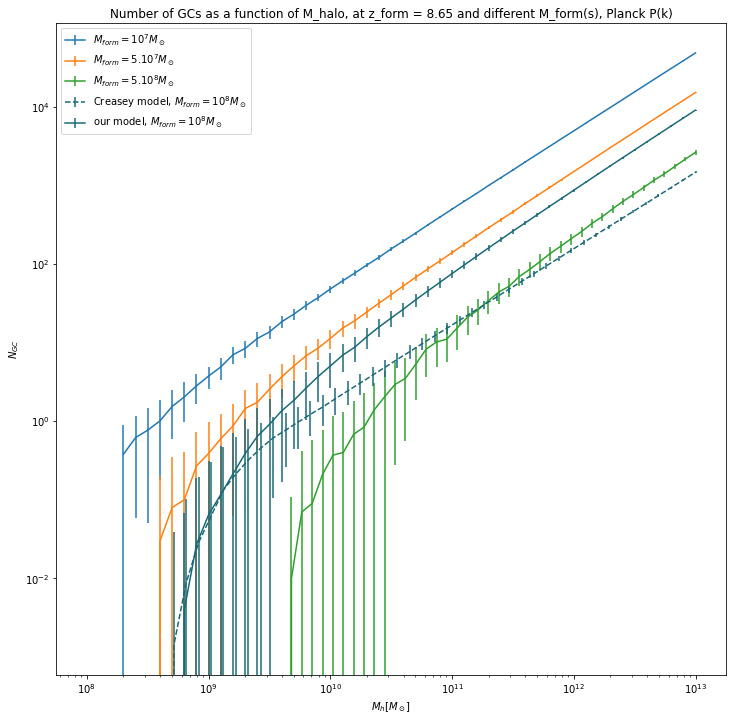

In [18]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')

plt.errorbar(10**mass, N_M1e7, yerr = error_M1e7, label ='$ M_{form} = 10^7 M_\odot$')
plt.errorbar(10**mass5e7, N_M5e7, yerr = error_M5e7, label ='$ M_{form} = 5.10^7 M_\odot$')
plt.errorbar(10**mass5e8, N_M5e8, yerr = error_M5e8, label ='$ M_{form} = 5.10^8 M_\odot$')



#plt.plot(10**M_H17, 10**(eta_H17)*10**M_H17,'.', color ='#00c0f9', label='Harris 17 observational data')

#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, $M_{form} = 10^8 M_\odot$')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO WDM')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, $M_{form} = 10^8 M_\odot$')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO WDM')

#plt.errorbar(10**M_Z, 10**N_Z, yerr=10**err_Z, color='#dc00fe', fmt='s-', label ='Zaritsky low-mass halos')

#plt.plot(10**M_K19, N_K19, '*', color = '#fc4c4e' ,label='EMOSAICS, K19, GCs in MW-like galaxies')
#plt.plot(mass_E, triangle, 'v-', color='#1b02a3', label = 'EMOSAICS, RC22, $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', color='#006af9', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star,     '*-', color='#00c0f9', label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

#plt.plot(M_Creasey, N_Creasey,'v', color= '#CCFF00',  label ='Creasey simulation data')
#plt.plot(M_halo_F, N_GC_F, '+', color = '#dc00fe',    label ='Forbes18 data')

#plt.plot(M_h_array[check2],sum_NGC[check2], 'o', color ='#fc4c4e' , label = '#GCs in halos, true cen, Harris+Rvir data')
plt.title('Number of GCs as a function of M_halo, at z_form = 8.65 and different M_form(s), Planck P(k)')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_err_ver3.pdf')
plt.show()

fixed $M_{form}$ change $z_{form}$

In [19]:
#for M_form = 1e8 M_sun,  z_form = 6
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'z6.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
massz6 = np.loadtxt(path+'GCs-tree1z6.txt',usecols =(0))    

N_z6 = np.zeros(n_mass)
error_z6 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_z6[i]     = np.mean(data[0:ntrees,i])
    error_z6[i] = np.std(data[0:ntrees,i]) #standard deviation

In [20]:
#for M_form = 1e8 M_sun,  z_form = 7
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'z7.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
massz7 = np.loadtxt(path+'GCs-tree1z7.txt',usecols =(0))    

N_z7 = np.zeros(n_mass)
error_z7 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_z7[i]     = np.mean(data[0:ntrees,i])
    error_z7[i] = np.std(data[0:ntrees,i]) #standard deviation

In [21]:
#for M_form = 1e8 M_sun,  z_form = 9
for i in range (0,ntrees):    
    N       = np.loadtxt(path+'GCs-tree'+str(i+1)+'z9.txt',usecols =(1))        
    data[i] = N
    
#mass is the same for all trees, so no need to put inside that loop    
massz9 = np.loadtxt(path+'GCs-tree1z9.txt',usecols =(0))    

N_z9 = np.zeros(n_mass)
error_z9 = np.zeros(n_mass)
for i in range(0,n_mass):
    N_z9[i]     = np.mean(data[0:ntrees,i])
    error_z9[i] = np.std(data[0:ntrees,i]) #standard deviation

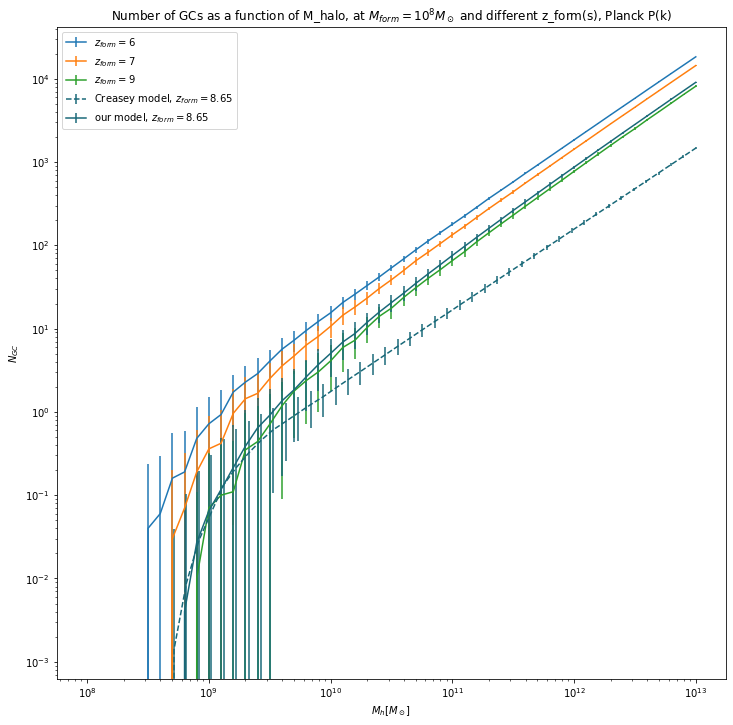

In [22]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')

plt.errorbar(10**massz6, N_z6, yerr = error_z6, label ='$ z_{form} = 6$')
plt.errorbar(10**massz7, N_z7, yerr = error_z7, label ='$ z_{form} = 7$')
plt.errorbar(10**massz9, N_z9, yerr = error_z9, label ='$ z_{form} = 9$')



#plt.plot(10**M_H17, 10**(eta_H17)*10**M_H17,'.', color ='#00c0f9', label='Harris 17 observational data')

#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, $z_{form} = 8.65$')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO WDM')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, $z_{form} = 8.65$')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO WDM')

#plt.errorbar(10**M_Z, 10**N_Z, yerr=10**err_Z, color='#dc00fe', fmt='s-', label ='Zaritsky low-mass halos')

#plt.plot(10**M_K19, N_K19, '*', color = '#fc4c4e' ,label='EMOSAICS, K19, GCs in MW-like galaxies')
#plt.plot(mass_E, triangle, 'v-', color='#1b02a3', label = 'EMOSAICS, RC22, $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', color='#006af9', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star,     '*-', color='#00c0f9', label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

#plt.plot(M_Creasey, N_Creasey,'v', color= '#CCFF00',  label ='Creasey simulation data')
#plt.plot(M_halo_F, N_GC_F, '+', color = '#dc00fe',    label ='Forbes18 data')

#plt.plot(M_h_array[check2],sum_NGC[check2], 'o', color ='#fc4c4e' , label = '#GCs in halos, true cen, Harris+Rvir data')
plt.title('Number of GCs as a function of M_halo, at $M_{form} = 10^8 M_\odot$ and different z_form(s), Planck P(k)')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_err_ver3.pdf')
plt.show()